In [608]:
import pandas as pd
from datetime import datetime
import numpy as np
import json
import glob
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import json
import seaborn as sns
%matplotlib inline

Example of importing functions from txt file

In [609]:
import my_practice_module

In [610]:
my_practice_module.hello_world()

Hello World


In [611]:
list_of_file_names = glob.glob("./zip_2/*.csv")

In [612]:
read_data_list_2 = []
fail_list = []
for i, data in enumerate(list_of_file_names):
    try:
        data = pd.read_csv(data)
        #data = unicode(data, errors='replace')
        read_data_list_2.append(data)
    except UnicodeDecodeError:
        fail_list.append(i)
#read_data_list
#fail_list
list_of_file_names_org = list_of_file_names

In [613]:
fail_list

[3]

In [614]:
for x in fail_list:
    del list_of_file_names[x]

In [615]:
list_of_file_names[3]

'./zip_2/Zip_Listings_PriceCut_SeasAdj_AllHomes.csv'

In [47]:
len_list = []
for file in useful_df:
    file_2 = len(file)
    len_list.append(file_2)

In [617]:
sixteen_list = []
for i, file in enumerate(useful_df):
    if len(file) >= 7000:
        sixteen_list.append(i)

(array([ 19.,  11.,   4.,   5.,   0.,   0.,   3.,   1.,   0.,   5.,   2.,
          0.,   8.,   4.,   0.,   0.,   3.,   2.,   2.,  14.]),
 array([  8.00000000e+00,   8.02550000e+02,   1.59710000e+03,
          2.39165000e+03,   3.18620000e+03,   3.98075000e+03,
          4.77530000e+03,   5.56985000e+03,   6.36440000e+03,
          7.15895000e+03,   7.95350000e+03,   8.74805000e+03,
          9.54260000e+03,   1.03371500e+04,   1.11317000e+04,
          1.19262500e+04,   1.27208000e+04,   1.35153500e+04,
          1.43099000e+04,   1.51044500e+04,   1.58990000e+04]),
 <a list of 20 Patch objects>)

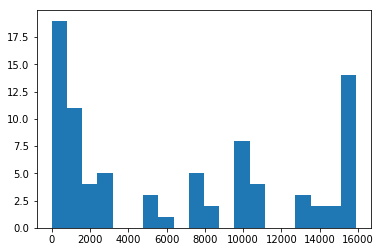

In [619]:
plt.hist(len_list, bins=20)

In [664]:
yelp_business = []
with open('./yelp_dataset/business.json') as data_file:    
    for line in data_file:
        data = json.loads(line)
        yelp_business.append(data)

In [665]:
df_yelp_business = pd.DataFrame(yelp_business)

In [666]:
df_yelp_business = df_yelp_business.sort_values('state',ascending=False)
#df_yelp_business = df_yelp_business.set_index('postal_code')

In [669]:
yelp_zip_list = df_yelp_business['postal_code'].unique()


array(['EH1 3AA', 'EH30 9TA', 'EH2 3AA', ..., '1528', '1511', '1531'], dtype=object)

In [670]:
# Reducing to only five digit zipcodes
five_digit = []
for z in yelp_zip_list:
    if len(z) == 5:
        five_digit.append(z)

In [687]:
# Making a df with the yelp zipcodes so I can merge with the Zillow df
five_digit.sort()
five_digit_list = []
bug_list = []
for digit in five_digit:
    try:
        new_digit = int(digit)
        five_digit_list.append(new_digit)
    except:
        bug_list.append(digit)
yelp_zip = pd.DataFrame()
yelp_zip['zips'] = five_digit_list
len(yelp_zip)
zero_list = []
for x in range(len(yelp_zip)):
    zero_list.append(0)
yelp_zip['zeroes'] = zero_list
yelp_zip = yelp_zip.set_index('zips')

In [28]:
df_yelp_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
156754,"Omni Centre, Greenside Place","{'RestaurantsGoodForGroups': True, 'Restaurant...",nWz3HA2RvJDZzDNeonsA_w,"[Restaurants, Chicken Wings, Portuguese]",Edinburgh,{},1,55.956392,-3.186225,Nando's,New Town,EH1 3AA,4,3.5,ZET
142651,"Airside Departures Lounge, Edinburgh Airport J...","{'BusinessParking': {'garage': False, 'street'...",8F4n9wX3mrD5MK4Nq2yeRg,"[Food, British, Coffee & Tea, Restaurants]",Edinburgh,"{'Monday': '4:30-20:30', 'Tuesday': '4:30-20:3...",1,55.948332,-3.364129,Costa Coffee,,EH12 9DN,6,4.5,XGL
155168,2 Crighton Place,"{'RestaurantsPriceRange2': 1, 'WiFi': 'no', 'B...",5ho3ULJKSikoRJr-xpM4SQ,"[Food, Convenience Stores, Coffee & Tea]",Edinburgh,{},1,55.962680,-3.178345,Bramble,Leith,EH7 4NZ,3,4.0,XGL
93013,7 Newhalls Road,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...",mmqSJyO2FNIlV18g4dMiWw,"[Nightlife, Bars, Pubs]",South Queensferry,"{'Monday': '12:00-23:00', 'Tuesday': '12:00-23...",1,55.989782,-3.385991,The Hawes Inn,,EH30 9TA,18,3.5,XGL
28827,109 Princes Street,"{'BusinessAcceptsCreditCards': True, 'Restaura...",PtOViDy0tqoocic2DAgd6A,"[Shopping, Department Stores, Fashion]",Edinburgh,"{'Monday': '9:30-18:00', 'Tuesday': '9:30-19:0...",1,55.951442,-3.202045,Debenhams,New Town,EH2 3AA,24,3.0,XGL


In [699]:
# build loop for data we can work with. Only dates and zip
def build_useful_df(data_list):
    useful_df = []
    for dataset in range(len(data_list)):
        data = read_data_list_2[dataset]
        region_name = data['RegionName']
        region_name = region_name.astype(int)
        new_df = data.select_dtypes(include=['float64'])
        new_df.insert(loc=0, column='RegionName', value=region_name) 
        new_df = new_df.sort_values('RegionName',ascending=False)
        new_df = new_df.set_index('RegionName')
        useful_df.append(new_df)
    return useful_df

In [700]:
useful_df = build_useful_df(read_data_list_2)


In [22]:
# concat all dfs into one multi-index. I am not currently using this
def df_build_dataframe(df_list, beginning, end):
    length = len(df_list[beginning:end])
    keys = []
    values = []
    final = []
    for x in range(length):
        y = str(x)
        keys.append(y)
    for df in df_list[beginning:end]:
        values.append(df)
    dictionary = dict(zip(keys, values))
    df = pd.concat(dictionary)
    return df
single_df = df_build_dataframe(useful_df, 3, 71)

In [23]:
# Building a list of all dataframes that work seamlessly with function. Tested through trial and error to get these 
# values
good_range = list(range(72))
good_range.remove(0)
good_range.remove(1)
good_range.remove(2)

In [705]:
def build_feature_list(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '1990-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
                    #big swing and gain, big swing and loss, big swing and big gain, big swing and big loss
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [472]:
def build_feature_list_add(good_range, df_list, pure_feature_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for feature in pure_feature_list:
        df = df_list[feature]
        feature_df_list.append(df)
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '2011-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [373]:
def build_feature_list_bugs(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        df = df.loc[:, '2011-01':'2016-12']
        features = pd.DataFrame()
        for i, year in enumerate(year_list):
            try:
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
                feature_df_list.append(features)
            except:
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                #change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                
                feature_df_list.append(features)
        #    bugs.append(num)
    return feature_df_list, bugs

In [266]:
len(useful_df)
for num in range(len(useful_df)):
    useful_df[num].dropna(inplace=True)

In [706]:
sixteen_doc_features, bugs = build_feature_list(sixteen_list, useful_df)

In [628]:
len(bugs)

20

In [629]:
len(sixteen_doc_features)

15

In [211]:
list_of_file_names[77]

'./zip_2/Zip_Zri_AllHomesPlusMultifamily_Summary.csv'

In [648]:
# Docs that don't need feature engineering. They are already aggregates
pure_features = [0, 71, 75, 77, 79, 81]
sixteen_doc_features[1].head()

,2011_mean,2011_std,2011_min,2011_max,2011_swing,2011_change,2012_mean,2012_std,2012_min,2012_max,...,2015_yoy,2015_gain,2016_mean,2016_std,2016_min,2016_max,2016_swing,2016_change,2016_yoy,2016_gain
RegionName,,,,,,,,,,,,,,,,,,,,,
99801,8.737707,2.668976,3.270054,12.457820,9.187766,-1.638298,8.375887,3.294851,4.551599,14.925776,...,1.142371,1,9.960122,3.179246,5.467737,16.714013,11.246276,1.219245,0.854903,0
99709,15.292930,4.304947,9.545075,25.197773,15.652698,4.628867,14.266617,2.313248,10.385404,17.292836,...,0.932655,0,15.462566,2.426758,10.402901,19.308360,8.905459,-2.962278,1.046422,1
99705,14.771745,3.035814,9.219219,20.683859,11.464640,-0.895525,14.162195,2.279545,9.922699,18.353496,...,0.782346,0,13.083236,3.086111,8.977494,19.611700,10.634206,-7.710742,0.960138,0
99669,10.946112,1.839319,8.474595,14.084393,5.609798,-4.590275,9.620692,1.472063,7.015491,11.650463,...,1.033731,1,13.225612,3.601565,8.603149,22.194993,13.591844,-1.786965,1.177421,1
99654,13.307311,2.180717,8.626867,16.407887,7.781020,-2.413729,14.321280,2.768978,10.590992,17.464021,...,1.033941,1,14.849717,2.158915,11.116177,17.820048,6.703871,-2.370956,0.872533,0


In [193]:
bugs_list_features, bugs = build_feature_list_bugs(bugs_list, useful_df)

KeyError: '2011-01'

In [189]:
len(bugs_list_features)

0

In [180]:
useful_df[52].head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01
RegionName,,,,,,,,,,,,,,,,,,,,,
99901,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,...,161.0,162.0,162.0,162.0,162.0,162.0,162.0,161.0,161.0,161.0
99801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.0,207.0,208.0,209.0,210.0,211.0,212.0,212.0,211.0,211.0
99712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,122.0,122.0,122.0,120.0,120.0,120.0,120.0,120.0,120.0
99709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,119.0,119.0,119.0,119.0,119.0,118.0,118.0,118.0,119.0,119.0
99705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.0,124.0,124.0,123.0,123.0,123.0,122.0,123.0,123.0,124.0


In [321]:
def build_feature_list_swing(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '2011-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    mean_yoy = features[year + '_yoy'].mean()
                    features[year + '_yoy_pos'] = np.where(features[year + '_yoy']>mean_yoy, 1, 0)
                    big_yoy = features[year + '_yoy'].std() + mean_yoy
                    features[year + '_yoy_big'] = np.where(features[year + '_yoy']>big_yoy, 1, 0)
                    features[year + '_yoy_neg'] = np.where(features[year + '_yoy']<mean_yoy, 1, 0)
                    big_loss = mean_yoy - features[year + '_yoy'].std() 
                    features[year + '_yoy_loss_big'] = np.where(features[year + '_yoy']<big_loss, 1, 0)
                mean_swing = features[year + '_swing'].mean()
                features[year + '_swing_pos'] = np.where(features[year + '_swing']>mean_swing, 1, 0)
                big_swing = features[year + '_swing'].std() + mean_swing
                features[year + '_swing_big'] = np.where(features[year + '_swing']>big_swing, 1, 0)
                features[year + '_swing_neg'] = np.where(features[year + '_swing']<mean_swing, 1, 0)
                swing_big_loss = mean_swing - features[year + '_swing'].std() 
                features[year + '_swing_loss_big'] = np.where(features[year + '_swing']<swing_big_loss, 1, 0)
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [14]:
feature_df_list, bug_list = build_feature_list([23], useful_df)

In [15]:
feature_df_list_swing, bug_list_swing = build_feature_list_swing([23], useful_df)

In [458]:
feature_df_list_swing[0].head()

,2011_mean,2011_std,2011_min,2011_max,2011_swing,2011_change,2011_swing_pos,2011_swing_big,2011_swing_neg,2011_swing_loss_big,...,2016_yoy,2016_gain,2016_yoy_pos,2016_yoy_big,2016_yoy_neg,2016_yoy_loss_big,2016_swing_pos,2016_swing_big,2016_swing_neg,2016_swing_loss_big
RegionName,,,,,,,,,,,,,,,,,,,,,
99901,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,1.090750,1,1,0,0,0,0,0,1,0
99801,188.225207,7.093943,172.811060,197.583313,24.772253,3.408637,1,0,0,0,...,0.999862,0,0,0,1,0,0,0,1,0
99709,184.281590,14.153608,169.023628,208.530806,39.507178,-39.507178,1,1,0,0,...,1.067973,1,1,0,0,0,1,0,0,0
99705,164.434369,3.401094,161.103048,172.209738,11.106690,-1.720695,0,0,1,0,...,1.061596,1,1,0,0,0,0,0,1,0
99701,124.640998,5.854324,110.247445,131.628788,21.381343,-8.482437,1,0,0,0,...,1.166714,1,1,1,0,0,1,0,0,0


In [649]:
len(sixteen_doc_features)
for num in range(len(sixteen_doc_features)):
    sixteen_doc_features[num].dropna(inplace=True)

In [16]:
len(feature_df_list)
for num in range(len(feature_df_list)):
    feature_df_list[num].dropna(inplace=True)

In [17]:
len(feature_df_list_swing)
for num in range(len(feature_df_list_swing)):
    feature_df_list_swing[num].dropna(inplace=True)

In [500]:
len(feature_df_list_mult)
for num in range(len(feature_df_list_mult)):
    feature_df_list_mult[num].dropna(inplace=True)

In [501]:
len(feature_df_list_swing_mult)
for num in range(len(feature_df_list_swing_mult)):
    feature_df_list_swing_mult[num].dropna(inplace=True)

In [502]:
len(feature_df_list[0])

6670

In [31]:
bug_list

[34, 45, 48, 52, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71]

In [499]:
# Merging all dfs into one. Merging on indez which is zipcode. I was hoping for inner join but it looks like
# There are many zipcodes that only exist in certain dfs. Im hoping that reducing them to metro areas will fix this
def merge_dataframes(feature_df_list):
    df_1 = feature_df_list[0]
    for df in feature_df_list[1:]:
        df_1 = pd.merge(df_1, df, left_index=True, right_index=True, how='inner')
    
    return df_1

In [707]:
X_16 = merge_dataframes(sixteen_doc_features)

In [708]:
X_16.dropna(inplace=True)

In [709]:
X_16.isnull().sum().sum()

0

In [710]:
X_16.head()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2012_mean_x,2012_std_x,2012_min_x,2012_max_x,...,2015_yoy,2015_gain,2016_mean,2016_std,2016_min,2016_max,2016_swing,2016_change,2016_yoy,2016_gain
RegionName,,,,,,,,,,,,,,,,,,,,,
99362,11.036472,1.492165,9.400227,14.401968,5.001741,-4.487889,10.576439,2.446100,8.135459,16.930241,...,1.025473,1,0.879167,0.012748,0.860,0.898,0.038,0.010,0.992661,0
99354,11.603599,2.824071,7.194803,16.110267,8.915463,-1.600303,10.357590,3.866544,5.474520,19.312839,...,1.052236,1,0.954333,0.012265,0.930,0.966,0.036,0.020,1.076721,1
99352,12.441976,1.441693,10.501647,14.742676,4.241029,2.483404,12.104165,1.145348,10.956463,14.625538,...,1.040691,1,0.905167,0.009282,0.882,0.912,0.030,0.022,1.072472,1
99337,12.516044,1.241358,10.124885,14.400625,4.275740,-2.111852,10.084839,1.982604,5.756287,12.123973,...,1.051158,1,0.885833,0.009003,0.868,0.898,0.030,0.012,1.064490,1
99224,12.350641,2.021761,9.421085,16.200779,6.779694,0.011361,11.630859,2.451484,7.557236,15.056059,...,1.055072,1,0.841000,0.015172,0.820,0.864,0.044,0.044,1.041056,1


In [654]:
len(X_16.columns)

690

In [655]:
len(df_yelp_business.columns)

15

In [656]:
df_yelp_business = df_yelp_business.sort_values('postal_code',ascending=False)
df_yelp_business = df_yelp_business.set_index('postal_code')

In [663]:
df_yelp_business.head(50)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,review_count,stars,state
postal_code,,,,,,,,,,,,,,
YO22 5LY,"North York Moors National Park, The Green, Goa...",{'RestaurantsPriceRange2': 4},hMAw6C_-67QgvkGVLaErEg,"[Gift Shops, Event Planning & Services, Flower...",Whitby,{},1,54.400141,-0.715568,Goathland Hotel,,4,3.5,NYK
YO22 5AL,Goathland,{},RqUt63tv4T3AvOBDMz34ng,"[Train Stations, Hotels & Travel]",Whitby,{},1,54.400509,-0.712087,Goathland Railway Station,,4,4.5,NYK
YO22 4RG,Robin Hoods Bay,{},Y5VQLoDhjFmJQbSsLyjhAA,"[Public Services & Government, Landmarks & His...",Whitby,{},1,54.435489,-0.533031,Robin Hood's Bay - Its History and Origins,,3,4.5,NYK
YO22 4NT,"Stainsacre Hall, Stainsacre near Whitby",{},IaeRHjObw6ydKerDWQ0g4g,"[Education, Hotels & Travel]",Whitby,{},1,54.462985,-0.592173,Stainsacre Hall,,3,3.5,NYK
YO22 4JT,Abbey Lane,{'GoodForKids': True},aWLt4-ADtKb8Nt9Bjgn6FQ,"[Public Services & Government, Active Life, Pa...",Whitby,"{'Sunday': '10:00-16:00', 'Saturday': '10:00-1...",1,54.488134,-0.605429,Whitby Abbey,,15,4.5,NYK
YO22 4DL,Harbour,{},ZqjJnu6h0e-y1wth43Vxbg,[Hotels & Travel],Whitby,{},1,54.489151,-0.611822,Whitby Harbour and Lighthouses,,3,4.5,NYK
YO22 4DE,105 Church Street,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",t1DWDiut4Q8hdSXdzlxyew,"[Jewelry, Shopping]",Whitby,{},1,54.488492,-0.612049,One O Five Whitby Jet Shop,,4,4.5,NYK
YO22 4DE,Church Street,"{'BusinessAcceptsCreditCards': True, 'CoatChec...",2ueyRysdmvgvqXSfE5DCKw,"[Nightlife, Bars, Pubs]",Whitby,{},1,54.488560,-0.612012,Duke Of York,,7,4.0,NYK
YO22 4DB,9 Sandgate,{},GYAMJdFczYZj61BO34VNWA,"[Home & Garden, Shopping, Home Decor, Arts & C...",Whitby,{},1,54.487507,-0.612634,Whitby Glass,,4,5.0,NYK


In [711]:
X_16.index

Int64Index([99362, 99354, 99352, 99337, 99224, 99223, 99218, 99217, 99216,
            99212,
            ...
             1077,  1075,  1069,  1056,  1040,  1028,  1020,  1013,  1002,
             1001],
           dtype='int64', name='RegionName', length=4149)

In [712]:
# Merging the Zillow data and the yelp zipcodes 
df_2 = pd.merge(X_16, yelp_zip, left_index=True, right_index=True, how='inner')

In [739]:
len(df_2)

303

In [503]:
df_one_sm = pd.merge(feature_df_list_swing_mult[0], feature_df_list_swing_mult[1], left_index=True, right_index=True, how='inner')
df_two_sm = pd.merge(df_one_sm, feature_df_list_swing_mult[2], left_index=True, right_index=True, how='inner')
df_three_sm = pd.merge(df_two_sm, feature_df_list_swing_mult[3], left_index=True, right_index=True, how='inner')
df_four_sm = pd.merge(df_three_sm, feature_df_list_swing_mult[4], left_index=True, right_index=True, how='inner')
df_five_sm = pd.merge(df_four_sm, feature_df_list_swing_mult[5], left_index=True, right_index=True, how='inner')
#df_six = pd.merge(df_five, feature_df_list[6], left_index=True, right_index=True, how='inner')

In [715]:
df_2 = df_2.iloc[:, :-1]

In [504]:
df_one_m = pd.merge(feature_df_list_mult[0], feature_df_list_mult[1], left_index=True, right_index=True, how='inner')
df_two_m = pd.merge(df_one_m, feature_df_list_mult[2], left_index=True, right_index=True, how='inner')
df_three_m = pd.merge(df_two_m, feature_df_list_mult[3], left_index=True, right_index=True, how='inner')
df_four_m = pd.merge(df_three_m, feature_df_list_mult[4], left_index=True, right_index=True, how='inner')
df_five_m = pd.merge(df_four_m, feature_df_list_mult[5], left_index=True, right_index=True, how='inner')
#df_six = pd.merge(df_five, feature_df_list[6], left_index=True, right_index=True, how='inner')

In [505]:
len(df_four_sm)

2733

In [151]:
list_of_file_names[24:50]
# 3, 6, 14, 23, 27, 35, 46, 

['./zip_2/Zip_MedianListingPricePerSqft_CondoCoop.csv',
 './zip_2/Zip_MedianListingPricePerSqft_DuplexTriplex.csv',
 './zip_2/Zip_MedianListingPricePerSqft_Sfr.csv',
 './zip_2/Zip_MedianPctOfPriceReduction_AllHomes.csv',
 './zip_2/Zip_MedianPctOfPriceReduction_Condominum.csv',
 './zip_2/Zip_MedianPctOfPriceReduction_SingleFamilyResidence.csv',
 './zip_2/Zip_MedianRentalPrice_1Bedroom.csv',
 './zip_2/Zip_MedianRentalPrice_2Bedroom.csv',
 './zip_2/Zip_MedianRentalPrice_3Bedroom.csv',
 './zip_2/Zip_MedianRentalPrice_4Bedroom.csv',
 './zip_2/Zip_MedianRentalPrice_5BedroomOrMore.csv',
 './zip_2/Zip_MedianRentalPrice_AllHomes.csv',
 './zip_2/Zip_MedianRentalPrice_CondoCoop.csv',
 './zip_2/Zip_MedianRentalPrice_DuplexTriplex.csv',
 './zip_2/Zip_MedianRentalPrice_Mfr5Plus.csv',
 './zip_2/Zip_MedianRentalPrice_Sfr.csv',
 './zip_2/Zip_MedianRentalPrice_Studio.csv',
 './zip_2/Zip_MedianRentalPricePerSqft_1Bedroom.csv',
 './zip_2/Zip_MedianRentalPricePerSqft_2Bedroom.csv',
 './zip_2/Zip_MedianRent

In [237]:
def create_y_ratio(df, col_1, col_2):
    y = pd.DataFrame()
    y['RegionName'] = df['RegionName']
    y['y'] = df[col_2] / df[col_1]
    y = y.sort_values('RegionName',ascending=False)
    y = y.set_index('RegionName')
    return y

In [716]:
y = create_y_ratio(read_data_list_2[23], '2016-12', '2017-12')

In [574]:
y.describe()

,y
count,10454.000000
mean,1.059853
std,0.081299
min,0.635848
25%,1.013011
50%,1.056295
75%,1.104116
max,1.438448


In [50]:
def create_y_cless(y):
    y = y
    y['y_classes'] = np.where(((y['y'] >= 1) & (y['y'] < 1.1), 4), 
         (np.where((y['y'] >= 1.1) & (y['y'] < 1.2), 5)), 
         (np.where((y['y'] >= 1.2) & (y['y'] < 1.3), 6)),
         (np.where(y['y'] >= 1.3, 7)),
         (np.where((y['y'] < 1) & (y['y'] >= .9), 3)),
         (np.where((y['y'] < .9) & (y['y'] >= .8), 2, 1)))
    return y

In [51]:
y_test = create_y_class(y)
y_test.head

NameError: name 'create_y_class' is not defined

In [508]:
X = feature_df_list[0]

In [509]:
X_s = feature_df_list_swing[0]

In [510]:
X_m = df_four_m

In [511]:
X_sm = df_four_sm

In [575]:
X_16 = pd.merge(X_16, y, right_index=True, left_index=True, how='inner')

In [720]:
X_2_df = pd.merge(df_2, y, right_index=True, left_index=True, how='inner')

In [512]:
X_df = pd.merge(X, y, right_index=True, left_index=True, how='inner')

In [513]:
Xm_df = pd.merge(X_m, y, right_index=True, left_index=True, how='inner')

In [514]:
Xs_df = pd.merge(X_s, y, right_index=True, left_index=True, how='inner')

In [515]:
Xsm_df = pd.merge(X_sm, y, right_index=True, left_index=True, how='inner')

In [516]:
len(second_df)

2733

In [718]:
X_2.dropna(inplace=True)
X_2.isnull().sum().sum()
X_2.describe()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2012_mean_x,2012_std_x,2012_min_x,2012_max_x,...,2015_gain,2016_mean,2016_std,2016_min,2016_max,2016_swing,2016_change,2016_yoy,2016_gain,y
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,14.221260,2.939228,9.784779,19.273019,9.488240,-2.825004,11.827926,2.655637,7.767436,16.566353,...,0.972509,0.870070,0.011161,0.851402,0.884729,0.033326,0.019993,1.032905,0.934708,1.077076
std,2.009130,1.252772,2.616664,2.915912,3.850881,4.847252,3.401679,0.933927,3.306389,4.028423,...,0.163792,0.285701,0.008130,0.280179,0.290911,0.022824,0.027356,0.027667,0.247466,0.068373
min,7.633182,0.813359,0.436835,11.926510,2.688029,-23.062877,4.134850,1.176347,-0.014776,6.645988,...,0.000000,0.527667,0.001435,0.512000,0.540000,0.006000,-0.088000,0.941028,0.000000,0.941771
25%,12.814587,2.065125,8.193079,17.368975,6.855841,-5.274488,9.678199,1.957905,5.588202,13.952067,...,1.000000,0.748083,0.005747,0.733000,0.760000,0.018000,0.005000,1.018599,1.000000,1.032679
50%,14.362419,2.641240,10.021496,18.975319,8.543629,-2.205505,12.403405,2.518386,8.287641,16.839613,...,1.000000,0.816667,0.008758,0.800000,0.824000,0.028000,0.020000,1.030833,1.000000,1.065823
75%,15.495098,3.545311,11.555948,20.799199,11.528685,0.285976,14.357412,3.136168,10.225409,19.448615,...,1.000000,0.925333,0.013806,0.905000,0.937000,0.042000,0.034000,1.041845,1.000000,1.106040
max,20.383593,9.054726,15.893417,31.246429,26.778011,8.031676,19.493785,7.867667,15.649228,30.525216,...,1.000000,4.570167,0.044676,4.494000,4.618000,0.146000,0.118000,1.161409,1.000000,1.425089


In [737]:
X_2_df['2016_gain'].sum() / len(X_2_df)

0.9347079037800687

In [576]:
X_16.dropna(inplace=True)
X_16.isnull().sum().sum()
X_16.describe()

,2000_mean_x,2000_std_x,2000_min_x,2000_max_x,2000_swing_x,2000_change_x,2001_mean_x,2001_std_x,2001_min_x,2001_max_x,...,2015_gain,2016_mean,2016_std,2016_min,2016_max,2016_swing,2016_change,2016_yoy,2016_gain,y
count,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,...,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000
mean,17.739977,6.039539,9.340652,28.410314,19.069662,-1.397967,17.495490,6.392419,8.842147,28.839196,...,0.339720,0.049256,0.017040,0.026257,0.076434,0.050177,0.008114,-1.748281,0.510748,1.067610
std,12.596746,4.863403,8.035894,19.226890,14.779159,16.151423,12.871771,5.612938,8.136627,20.261481,...,0.473669,0.038246,0.010885,0.037293,0.043751,0.030705,0.047964,164.822264,0.499943,0.073020
min,0.059167,0.043589,0.000000,0.290000,0.120000,-88.580000,0.044167,0.033699,0.000000,0.140000,...,0.000000,-0.069977,0.001964,-0.121595,-0.024656,0.006188,-0.228894,-10650.532154,0.000000,0.790926
25%,7.828542,2.490601,3.197500,13.357500,7.937500,-8.280000,6.950833,2.484759,2.400000,12.420000,...,0.000000,0.022373,0.009304,0.001385,0.045801,0.028555,-0.020620,0.591019,0.000000,1.022508
50%,15.622083,4.849436,7.560000,25.155000,15.355000,-1.175000,14.966667,4.961817,6.550000,25.080000,...,0.000000,0.045193,0.014237,0.023607,0.069847,0.042676,0.009022,1.021689,1.000000,1.062211
75%,25.100000,8.378150,13.317500,39.932500,26.380000,5.190000,25.228958,8.479304,13.210000,41.480000,...,1.000000,0.072141,0.021674,0.049174,0.100877,0.062750,0.036916,1.604732,1.000000,1.106966
max,71.092500,37.417051,51.440000,99.370000,97.680000,77.070000,85.063333,43.794022,55.610000,99.670000,...,1.000000,0.210652,0.093161,0.173223,0.311653,0.246608,0.246608,834.736426,1.000000,1.435638


In [722]:
X_2 = X_2_df.iloc[:, :-1].values
y_2 = X_2_df.iloc[:, -1].values

In [580]:
X_16_df = X_16.iloc[:, :-1].values
y_16 = X_16.iloc[:, -1].values

In [517]:
X = X_df.iloc[:, :-1].values
y = X_df.iloc[:, -1].values

In [518]:
X_s = Xs_df.iloc[:, :-1].values
y_s = Xs_df.iloc[:, -1].values

In [519]:
X_m = Xm_df.iloc[:, :-1].values
y_m = Xm_df.iloc[:, -1].values

In [520]:
X_sm = Xsm_df.iloc[:, :-1].values
y_sm = Xsm_df.iloc[:, -1].values

In [738]:
X_2_df['y'].describe()

count    291.000000
mean       1.077076
std        0.068373
min        0.941771
25%        1.032679
50%        1.065823
75%        1.106040
max        1.425089
Name: y, dtype: float64

In [582]:
X_16['y'].describe()

count    4280.000000
mean        1.067610
std         0.073020
min         0.790926
25%         1.022508
50%         1.062211
75%         1.106966
max         1.435638
Name: y, dtype: float64

In [521]:
X_16_df

array([[  1.98408333e+01,   5.28288568e+00,   1.26100000e+01, ...,
          4.44783710e-02,   1.11710935e+00,   1.00000000e+00],
       [  8.59416667e+00,   2.68156148e+00,   4.90000000e+00, ...,
          3.36152944e-02,   1.16117045e+00,   1.00000000e+00],
       [  9.57916667e+00,   4.12912815e+00,   4.05000000e+00, ...,
          2.08722085e-02,   1.76863352e+00,   1.00000000e+00],
       ..., 
       [  3.84833333e+00,   7.56057457e+00,   3.00000000e-02, ...,
         -1.84320184e-02,   2.15476923e+01,   1.00000000e+00],
       [  7.37000000e+00,   8.97160267e+00,   1.15000000e+00, ...,
          1.24468539e-02,   9.77659456e-01,   0.00000000e+00],
       [  2.06333333e+00,   1.31138604e+00,   6.10000000e-01, ...,
         -1.59529241e-02,   8.84642600e-01,   0.00000000e+00]])

In [723]:
X_2.max()

400000.0

In [583]:
X_16_df.max()

94695.609918770569

In [724]:
X_2 = X_2 / 400000

In [584]:
X_16_df = X_16_df / 94650

In [725]:
X_2.max()

1.0

In [525]:
X = X / 3299000

In [526]:
X_s = X_s / 3299000

In [527]:
X_m = X_m / 3299000

In [528]:
X_sm = X_sm / 3299000

In [529]:
y_s.shape

(6670,)

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2)

In [531]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size= .2)

In [586]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16_df, y_16, test_size= .2)

In [532]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size= .2)

In [533]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size= .2)

In [555]:
model = Sequential()
model.add(Dense(64, input_shape=(46,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.002)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [556]:
model.fit(x=X_train, y=y_train, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=None)

Train on 5336 samples, validate on 1334 samples
Epoch 1/2000
5336/5336 [==============================] - 5s 926us/step - loss: 1.1111 - val_loss: 1.0666
Epoch 2/2000
5336/5336 [==============================] - 3s 513us/step - loss: 1.0558 - val_loss: 1.0107
Epoch 3/2000
5336/5336 [==============================] - 3s 503us/step - loss: 1.0013 - val_loss: 0.9576
Epoch 4/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.9495 - val_loss: 0.9072
Epoch 5/2000
5336/5336 [==============================] - 3s 500us/step - loss: 0.9002 - val_loss: 0.8591
Epoch 6/2000
5336/5336 [==============================] - 3s 511us/step - loss: 0.8532 - val_loss: 0.8134
Epoch 7/2000
5336/5336 [==============================] - 3s 503us/step - loss: 0.8086 - val_loss: 0.7701
Epoch 8/2000
5336/5336 [==============================] - 3s 502us/step - loss: 0.7661 - val_loss: 0.7289
Epoch 9/2000
5336/5336 [==============================] - 3s 503us/step - loss: 0.7258 - val_loss: 0.689

5336/5336 [==============================] - 3s 489us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 154/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 155/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 156/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 157/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 158/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 159/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 160/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 161/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 162/2000
5336/5336 [=================

Epoch 229/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 230/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 231/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 232/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 233/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 234/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 235/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 236/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 237/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 238/2000
5336/5336 [==

Epoch 305/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 306/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 307/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 308/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 309/2000
5336/5336 [==============================] - 3s 480us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 310/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 311/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 312/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 313/2000
5336/5336 [==============================] - 3s 480us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 314/2000
5336/5336 [==

Epoch 381/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 382/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 383/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 384/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 385/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 386/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 387/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 388/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 389/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 390/2000
5336/5336 [==

Epoch 457/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 458/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 459/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 460/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 461/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 462/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 463/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 464/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 465/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 466/2000
5336/5336 [==

Epoch 533/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 534/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 535/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 536/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 537/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 538/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 539/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 540/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 541/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 542/2000
5336/5336 [==

Epoch 609/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 610/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 611/2000
5336/5336 [==============================] - 3s 498us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 612/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 613/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 614/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 615/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 616/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 617/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 618/2000
5336/5336 [==

Epoch 685/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 686/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 687/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 688/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 689/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 690/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 691/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 692/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 693/2000
5336/5336 [==============================] - 3s 502us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 694/2000
5336/5336 [==

Epoch 761/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 762/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 763/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 764/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 765/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 766/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 767/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 768/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 769/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 770/2000
5336/5336 [==

Epoch 837/2000
5336/5336 [==============================] - 3s 502us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 838/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0056 - val_loss: 0.0051
Epoch 839/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 840/2000
5336/5336 [==============================] - 3s 501us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 841/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 842/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 843/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 844/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 845/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 846/2000
5336/5336 [==

Epoch 913/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 914/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 915/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 916/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 917/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 918/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 919/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 920/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 921/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 922/2000
5336/5336 [==

Epoch 989/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 990/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 991/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 992/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 993/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 994/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 995/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 996/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 997/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 998/2000
5336/5336 [==

5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 1140/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 1141/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1142/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1143/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1144/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1145/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1146/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1147/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1148/2000
5336/5336 [========

5336/5336 [==============================] - 3s 526us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1290/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 1291/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1292/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1293/2000
5336/5336 [==============================] - 3s 480us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1294/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1295/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1296/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1297/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1298/2000
5336/5336 [========

5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1440/2000
5336/5336 [==============================] - 3s 498us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 1441/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1442/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1443/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1444/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1445/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1446/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1447/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1448/2000
5336/5336 [========

5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 1590/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1591/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1592/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1593/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1594/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1595/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1596/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1597/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 1598/2000
5336/5336 [========

5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1740/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1741/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 1742/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1743/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1744/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 1745/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1746/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1747/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1748/2000
5336/5336 [========

5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1890/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1891/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0050
Epoch 1892/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1893/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1894/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1895/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1896/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0054 - val_loss: 0.0050
Epoch 1897/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0050
Epoch 1898/2000
5336/5336 [========

In [557]:
model = Sequential()
model.add(Dense(64, input_shape=(90,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [558]:
model.fit(x=X_train_s, y=y_train_s, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_s, y_test_s),
          callbacks=None)

Train on 5336 samples, validate on 1334 samples
Epoch 1/2000
5336/5336 [==============================] - 5s 906us/step - loss: 1.0742 - val_loss: 0.8664
Epoch 2/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.8218 - val_loss: 0.6511
Epoch 3/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.6200 - val_loss: 0.4853
Epoch 4/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.4641 - val_loss: 0.3586
Epoch 5/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.3450 - val_loss: 0.2620
Epoch 6/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.2540 - val_loss: 0.1897
Epoch 7/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.1856 - val_loss: 0.1357
Epoch 8/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.1340 - val_loss: 0.0961
Epoch 9/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0967 - val_loss: 0.067

5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 154/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 155/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 156/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 157/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 158/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 159/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 160/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 161/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 162/2000
5336/5336 [=================

Epoch 229/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 230/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 231/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 232/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 233/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 234/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 235/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 236/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 237/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 238/2000
5336/5336 [==

Epoch 305/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 306/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 307/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 308/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 309/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 310/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 311/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 312/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 313/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 314/2000
5336/5336 [==

Epoch 381/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 382/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 383/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 384/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 385/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 386/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 387/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 388/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 389/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 390/2000
5336/5336 [==

Epoch 457/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 458/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 459/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 460/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 461/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 462/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 463/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 464/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 465/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 466/2000
5336/5336 [==

Epoch 533/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 534/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 535/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 536/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 537/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 538/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 539/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 540/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 541/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 542/2000
5336/5336 [==

Epoch 609/2000
5336/5336 [==============================] - 3s 517us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 610/2000
5336/5336 [==============================] - 3s 592us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 611/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 612/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 613/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 614/2000
5336/5336 [==============================] - 3s 519us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 615/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 616/2000
5336/5336 [==============================] - 3s 510us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 617/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 618/2000
5336/5336 [==

Epoch 685/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 686/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 687/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 688/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 689/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 690/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 691/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 692/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 693/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 694/2000
5336/5336 [==

Epoch 761/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 762/2000
5336/5336 [==============================] - 3s 513us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 763/2000
5336/5336 [==============================] - 3s 553us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 764/2000
5336/5336 [==============================] - 3s 557us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 765/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 766/2000
5336/5336 [==============================] - 3s 523us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 767/2000
5336/5336 [==============================] - 3s 528us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 768/2000
5336/5336 [==============================] - 3s 516us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 769/2000
5336/5336 [==============================] - 3s 509us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 770/2000
5336/5336 [==

Epoch 837/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 838/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 839/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 840/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 841/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 842/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 843/2000
5336/5336 [==============================] - 3s 520us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 844/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 845/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 846/2000
5336/5336 [==

Epoch 913/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 914/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 915/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 916/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 917/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 918/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 919/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 920/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 921/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 922/2000
5336/5336 [==

Epoch 989/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 990/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 991/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 992/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 993/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 994/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 995/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 996/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 997/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 998/2000
5336/5336 [==

5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1140/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1141/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1142/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1143/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1144/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1145/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1146/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1147/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 1148/2000
5336/5336 [========

5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1290/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1291/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1292/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1293/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1294/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1295/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1296/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1297/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1298/2000
5336/5336 [========

5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1440/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1441/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1442/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1443/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1444/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1445/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1446/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1447/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1448/2000
5336/5336 [========

5336/5336 [==============================] - 3s 490us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1590/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1591/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1592/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1593/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1594/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1595/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1596/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1597/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1598/2000
5336/5336 [========

5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1740/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1741/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1742/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1743/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1744/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1745/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1746/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1747/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1748/2000
5336/5336 [========

5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1890/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1891/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1892/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1893/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1894/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1895/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1896/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1897/2000
5336/5336 [==============================] - 3s 501us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1898/2000
5336/5336 [========

In [89]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size= .2)

In [726]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size= .3)

In [136]:
y_16

array([ 1.05329405,  1.12662344,  1.08065202, ...,  0.99302723,
        1.0074516 ,  1.07181999])

In [135]:
X_16_df

array([[  1.20542047e-04,   2.94347206e-06,   1.17223911e-04, ...,
          1.01317123e-07,   1.00573546e-05,   0.00000000e+00],
       [  1.08620399e-04,   2.74134129e-06,   1.05876393e-04, ...,
          2.02634245e-07,   1.09090230e-05,   1.01317123e-05],
       [  1.15501520e-04,   3.06397696e-06,   1.13069909e-04, ...,
          2.22897670e-07,   1.08659813e-05,   1.01317123e-05],
       ..., 
       [  1.01148261e-04,   2.54756143e-06,   9.73657548e-05, ...,
          4.45795339e-07,   1.02013002e-05,   1.01317123e-05],
       [  1.45533604e-04,   5.09203118e-06,   1.37689970e-04, ...,
          9.72644377e-07,   1.07722709e-05,   1.01317123e-05],
       [  1.06779804e-04,   4.98123265e-06,   1.02026342e-04, ...,
          2.43161094e-07,   1.02495897e-05,   1.01317123e-05]])

In [528]:
.0055 ** .5

0.07416198487095663

In [510]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(690,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .02
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [341]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(1350,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
# Added
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .005
sgd = keras.optimizers.SGD(lr=0.005)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [729]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(690,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
# Added
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .005
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [732]:
model.fit(x=X_train_2, y=y_train_2, 
          batch_size=2500, 
          epochs=30, 
          verbose=1, 
          validation_data=(X_test_2, y_test_2),
          callbacks=None)



Train on 203 samples, validate on 88 samples
Epoch 1/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 2/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 3/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 4/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 5/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 6/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 7/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 8/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 9/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 10/30
203/203 [==============================] - 

KeyboardInterrupt: 

In [311]:
# Without new features
root = .0040 ** .5
# .071
root

In [417]:
X_16['y'].describe()

count    2400.000000
mean        1.066686
std         0.065818
min         0.831398
25%         1.024956
50%         1.061385
75%         1.101586
max         1.425089
Name: y, dtype: float64

In [561]:
# new datasets with new features (big swing)
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='relu'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [562]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)



Train on 2186 samples, validate on 547 samples
Epoch 1/2000
2186/2186 [==============================] - 3s 2ms/step - loss: 1.1054 - val_loss: 1.0352
Epoch 2/2000
2186/2186 [==============================] - 1s 502us/step - loss: 1.0320 - val_loss: 0.9584
Epoch 3/2000
2186/2186 [==============================] - 1s 519us/step - loss: 0.9561 - val_loss: 0.8839
Epoch 4/2000
2186/2186 [==============================] - 1s 496us/step - loss: 0.8826 - val_loss: 0.8130
Epoch 5/2000
2186/2186 [==============================] - 1s 498us/step - loss: 0.8131 - val_loss: 0.7462
Epoch 6/2000
2186/2186 [==============================] - 1s 506us/step - loss: 0.7475 - val_loss: 0.6837
Epoch 7/2000
2186/2186 [==============================] - 1s 508us/step - loss: 0.6858 - val_loss: 0.6255
Epoch 8/2000
2186/2186 [==============================] - 1s 505us/step - loss: 0.6284 - val_loss: 0.5714
Epoch 9/2000
2186/2186 [==============================] - 1s 500us/step - loss: 0.5750 - val_loss: 0.5213
E

Epoch 78/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 79/2000
2186/2186 [==============================] - 1s 491us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 80/2000
2186/2186 [==============================] - 1s 492us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 81/2000
2186/2186 [==============================] - 1s 489us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 82/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 83/2000
2186/2186 [==============================] - 1s 492us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 84/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0036
Epoch 85/2000
2186/2186 [==============================] - 1s 508us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 86/2000
2186/2186 [==============================] - 1s 499us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 87/2000
2186/2186 [============

KeyboardInterrupt: 

In [563]:
# new datasets with new features (big swing) and new layers
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [ ]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)

Train on 2186 samples, validate on 547 samples
Epoch 1/2000
2186/2186 [==============================] - 9s 4ms/step - loss: 1.1104 - val_loss: 1.0365
Epoch 2/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 1.0305 - val_loss: 0.9589
Epoch 3/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.9543 - val_loss: 0.8822
Epoch 4/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.8791 - val_loss: 0.8091
Epoch 5/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.8070 - val_loss: 0.7405
Epoch 6/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.7393 - val_loss: 0.6766
Epoch 7/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.6760 - val_loss: 0.6172
Epoch 8/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.6172 - val_loss: 0.5622
Epoch 9/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.5626 - val_loss: 0.5114
Epoch 10/2000
218

Epoch 79/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 80/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 81/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 82/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 83/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 84/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 85/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 86/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 87/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 88/2000
2186/2186 [==============================

Epoch 157/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 158/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 159/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 160/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 161/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 162/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 163/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 164/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 165/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 166/2000
2186/2186 [====================

Epoch 235/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 236/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 237/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 238/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 239/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 240/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 241/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 242/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 243/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 244/2000
2186/2186 [====================

Epoch 313/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 314/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 315/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 316/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 317/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 318/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 319/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 320/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 321/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 322/2000
2186/2186 [====================

Epoch 391/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 392/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 393/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 394/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 395/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 396/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 397/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 398/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 399/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 400/2000
2186/2186 [====================

In [ ]:
# new datasets with new features (big swing) and new layers
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [ ]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)